<a href="https://colab.research.google.com/github/looee1q/PracticalML/blob/9-decision-tree/Decision_tree_screencast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Посмотрим, как обучать решающие деревья в python.

In [59]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Будем предсказывать стоимость домов в Калифорнии.

In [60]:
import numpy as np

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [61]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [62]:
y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


Разобъем данные на тренировочную и тестовые части. Обучим дерево на трейне и оценим качество ($R^2$) на тесте.

In [63]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [64]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [65]:
from sklearn.metrics import r2_score

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.6078150953469774

In [66]:
pred_train = model.predict(Xtrain)

r2_score(ytrain, pred_train)

1.0

In [67]:
len(np.unique(pred_train))

3618

In [68]:
model.get_depth()

36

Дерево сильно переобучилось!

Попробуем ограничить его по глубине.

2 	 0.45120526546918793 	 0.43088594895460397 	 4
4 	 0.5881529015244183 	 0.5667458138420974 	 16
6 	 0.6735290661749251 	 0.63493185070596 	 64
8 	 0.7551678130970392 	 0.6774347107560865 	 237
10 	 0.8322088758923646 	 0.6839043260081726 	 763
12 	 0.8981042152072042 	 0.6630225329509408 	 1982
14 	 0.9446411229582562 	 0.6366215300852711 	 4066
16 	 0.9733697013892558 	 0.6221226113645537 	 6713
18 	 0.9891436915006775 	 0.6119916798632379 	 9430
20 	 0.995943271035502 	 0.6071286402416152 	 11655
22 	 0.9985399837449609 	 0.6072974488704659 	 13191
24 	 0.9996017215698247 	 0.6040809105406854 	 14086
26 	 0.9999171373512237 	 0.5989304412140257 	 14531
28 	 0.9999825921981347 	 0.6036172630244211 	 14730
30 	 0.9999970173184505 	 0.59962916514728 	 14813
32 	 0.9999987571979618 	 0.6058587534575923 	 14826
34 	 0.9999999248171355 	 0.6087178673893434 	 14839
36 	 1.0 	 0.6062614966917599 	 14846
38 	 1.0 	 0.6178432436106468 	 14841


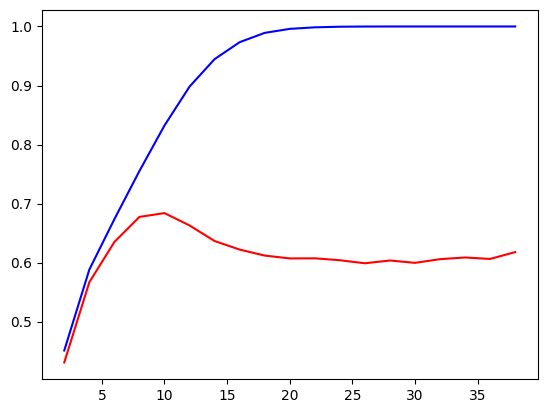

In [69]:
from matplotlib import pyplot as plt

train_scores = []
test_scores = []
depth_range = np.arange(2, 38 + 2, 2)

for depth in depth_range:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)

    train_r2 = r2_score(ytrain, pred_train)
    test_r2 = r2_score(ytest, pred_test)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

    print(depth, '\t', train_r2, '\t', test_r2, '\t', model.get_n_leaves())

plt.plot(depth_range, train_scores, color='blue')
plt.plot(depth_range, test_scores, color='red')
plt.show()

Кросс-валидация

Судя по результатам эксперимента, оптимальная глубина дерева max_depth = 8. Но это мы узнали по конкретному разбиению на train-test.

Чтобы не привязываться к конкретному разбиению, можно посмотреть качество модели по кросс-валидации.

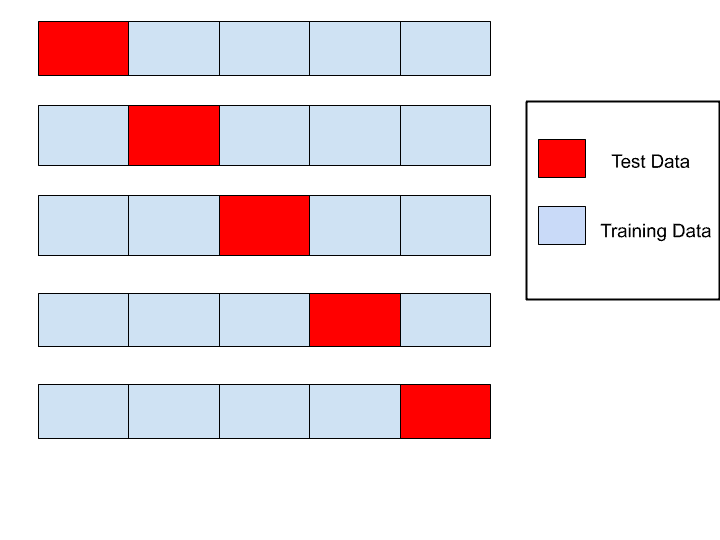

In [70]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(max_depth = 8)

cross_val_score(model, X, y, cv=3, scoring='r2')

array([0.47611937, 0.60466826, 0.4667997 ])

In [71]:
cross_val_score(model, X, y, cv=3, scoring='r2').mean()

np.float64(0.5147164843688298)

Решающее дерево можно визуализировать.

Это очень удобно для интерпретации результатов.

In [72]:
model = DecisionTreeRegressor(max_depth = 4)
model.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=4)

In [73]:
!pip install -q dtreeviz

In [74]:
import dtreeviz

viz_model = dtreeviz.model(model, Xtrain, ytrain,
                           feature_names=Xtrain.columns)

viz_model.view(fancy = False, scale = 2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
